# Customer Churn(ANN)

Predicting customer churn using kaggle dataset

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras import models, layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data

In [2]:
df = pd.read_csv("customer_churn.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Data Processing

## Drop Customer ID Column

In [3]:
df.drop(['customerID'], axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Convert Total Charges from object to numeric

In [4]:
df = df[df.TotalCharges!=' ']
df.TotalCharges = pd.to_numeric(df.TotalCharges)

# Data Visualisation

## Tenure

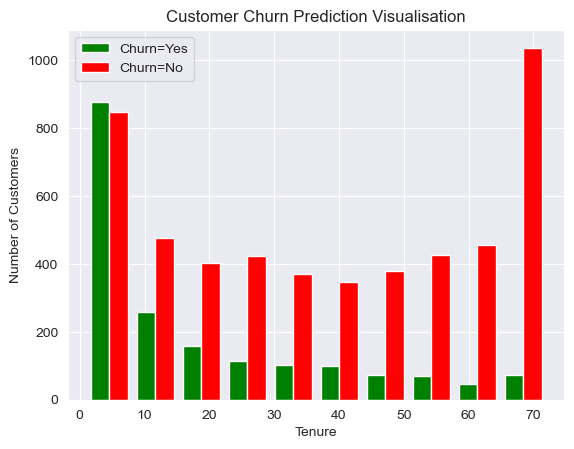

In [5]:
tenure_churn_no = df[df.Churn == 'No'].tenure
tenure_churn_yes = df[df.Churn == 'Yes'].tenure

plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Visualisation')

plt.hist([tenure_churn_yes, tenure_churn_no], color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

# Categorical Label Encoding

Let's find the yes/no columns for label encoding


In [6]:
def print_unique_col_values(df):
    for col in df:
        if df[col].dtypes == 'object':
            print(f'{col}: {df[col].unique()}')

In [7]:
print_unique_col_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


Replace "No internet service" and "No phone service" with No

In [8]:
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)
print_unique_col_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [9]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns:
    df[col].replace({'Yes': 1, 'No': 0}, inplace=True)

In [10]:
print_unique_col_values(df)

gender: ['Female' 'Male']
InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


## Gender column

In [11]:
df['gender'].replace({'Male': 1, 'Female': 0}, inplace=True)
df['gender'].unique()

array([0, 1])

# One hot encoding for categorical variables

In [12]:
print_unique_col_values(df)

InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [13]:
df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


## Check Data Types

In [14]:
df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

There are no objects/catgorical variables

# Data Scaling

As the features are measued on different scales or units for example tenures is measured in months, charges are in dollars etc

We do not want to add bias to the model and favor those features with higher numeric values

In [15]:
col_to_scale = ['tenure', 'TotalCharges', 'MonthlyCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[col_to_scale] = scaler.fit_transform(df[col_to_scale])

In [16]:
df[col_to_scale].head()

,tenure,TotalCharges,MonthlyCharges
0,0.000000,0.001275,0.115423
1,0.464789,0.215867,0.385075
2,0.014085,0.010310,0.354229
3,0.619718,0.210241,0.239303
4,0.014085,0.015330,0.521891


# Train/Test Split

In [17]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
X_train.shape, X_test.shape

((5625, 26), (1407, 26))

# Neural Network

* Input Layer(input_shape): 26 input layers for each feature
* Hidden Layer: 20, ReLu
* Output Layer: Sigmoid


In [20]:
model = models.Sequential([
    # Input and Hidden Layer
    layers.Dense(20, input_shape=(26,), activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='RMSprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# TensorBoard Callback
tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/RMSprop", histogram_freq=1)
model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

2023-03-19 10:24:27.388290: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-19 10:24:27.388842: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-03-19 10:24:27.615088: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Metal device set to: Apple M1 Pro
Epoch 1/5


2023-03-19 10:24:28.072026: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


176/176 [==============================] - 2s 10ms/step - loss: 0.4960 - accuracy: 0.7554
Epoch 2/5
176/176 [==============================] - 2s 9ms/step - loss: 0.4314 - accuracy: 0.7966
Epoch 3/5
176/176 [==============================] - 2s 9ms/step - loss: 0.4227 - accuracy: 0.7984
Epoch 4/5
176/176 [==============================] - 1s 8ms/step - loss: 0.4201 - accuracy: 0.7991
Epoch 5/5
176/176 [==============================] - 1s 8ms/step - loss: 0.4183 - accuracy: 0.8009


# Model Evaluation

In [21]:
model.evaluate(X_test, y_test)

23/44 [==============>...............] - ETA: 0s - loss: 0.4280 - accuracy: 0.8193

2023-03-19 10:24:36.394994: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


44/44 [==============================] - 0s 6ms/step - loss: 0.4290 - accuracy: 0.8031


[0.4289546012878418, 0.8031272292137146]

# Model Prediction

In [23]:
yp = model.predict(X_test)
yp[:5]

array([[0.26231706],
       [0.11461617],
       [0.14483602],
       [0.58090657],
       [0.77442956]], dtype=float32)

In [24]:
y_test[:5]

5561    0
5814    0
2645    0
3983    1
6438    1
Name: Churn, dtype: int64

In [40]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
y_pred[:5]

[0, 0, 0, 1, 1]

# Classification Report

In [26]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1038
           1       0.66      0.51      0.57       369

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



## Confusion Matrix

Text(52.722222222222214, 0.5, 'Truth')

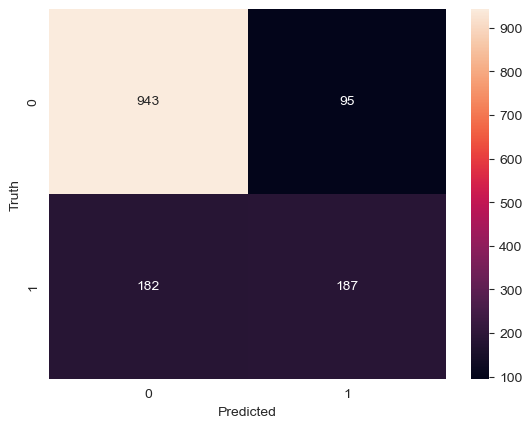

In [27]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Values on the diagonal are fine, those not on the diagonal are errors

Total Errors: 182 + 95 = 277
Correct: 943 + 187 = 1130
Total: 277 + 1130 = 1407

In [35]:
accuracy = 1130 / 1407
round(accuracy, 2)

0.8

## Precision
Accurate predictions

In [38]:
precision_0 = 943 / (943 + 182)
precision_1 = 187 / (95 + 187)
precision_0, precision_1

(0.8382222222222222, 0.6631205673758865)

## Recall

In [39]:
recall_0 = 943 / (943+95)
recall_1 = 182 / (182+187)
recall_0, recall_1

(0.9084778420038536, 0.4932249322493225)